In [1]:
import pandas as pd

In [4]:
cust_shop_df = pd.read_csv(r"D:\\Edureka\DS&ML_internship\Shopping_Data_for_Hierarchicalclustering_Demo\shopping_data.csv")
cust_shop_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
cust_shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
filter_cust_shop_df = cust_shop_df.iloc[:,3:5]
filter_cust_shop_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
filter_cust_shop_df.shape

(200, 2)

In [8]:
import scipy.cluster.hierarchy as sch

import matplotlib.pyplot as plt

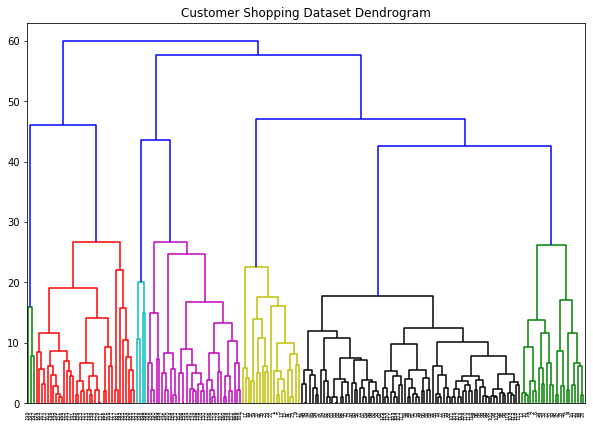

In [9]:
plt.figure(figsize=(10,7))
plt.title("Customer Shopping Dataset Dendrogram")

dend = sch.dendrogram(sch.linkage(filter_cust_shop_df.values, method="average"))

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
agglo_cluster_model = AgglomerativeClustering(n_clusters=7,linkage="average")

In [13]:
agglo_cluster_model.fit(filter_cust_shop_df)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [14]:
agglo_cluster_model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 6,
       2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 5, 0, 5, 4, 5, 4,
       5, 4], dtype=int64)

**Visualizing the clusters**

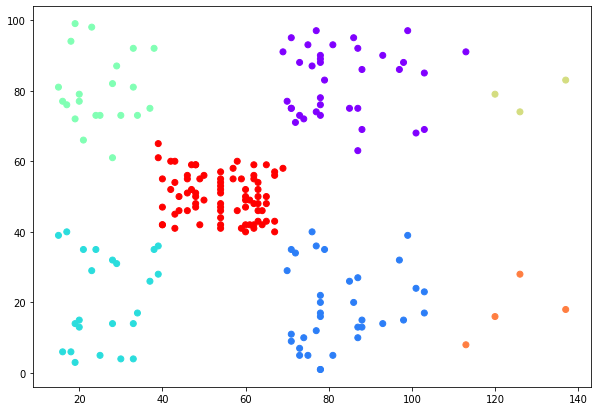

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(filter_cust_shop_df.iloc[:,0] , filter_cust_shop_df.iloc[:,1] , c=agglo_cluster_model.labels_ , cmap ='rainbow' )
plt.show()

In [21]:
filter_cust_shop_df["Cluster labels"] = agglo_cluster_model.labels_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


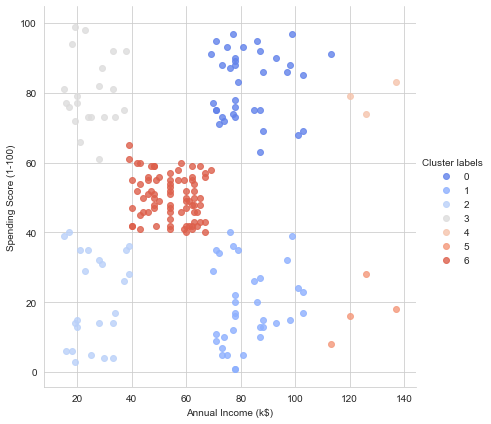

In [23]:
import seaborn as sns

sns.set_style('whitegrid')
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=filter_cust_shop_df, hue='Cluster labels',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)
plt.show()